In [1]:
#Outlier removal using standard deviation and z score
import pandas as pd

df = pd.read_csv("C://Users//khushi//Desktop//py//codebasicspy//ML//FeatureEngineering//2_outliers_z_score//Exercise//bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [3]:
df.shape

(13200, 7)

In [4]:
#using percentile

In [5]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000099)

In [6]:
df2 = df[(df.price_per_sqft < max_threshold) & (df.price_per_sqft > min_threshold)]
df2.shape

(13172, 7)

In [7]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [8]:
#using 4 standard deviation

In [9]:
lower_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()

In [10]:
df3 = df2[(df2.price_per_sqft < upper_limit) & (df2.price_per_sqft > lower_limit)]
df3.shape

(13047, 7)

In [11]:
df2.shape[0] - df3.shape[0]

125

In [12]:
import matplotlib 
from matplotlib import pyplot as plt 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

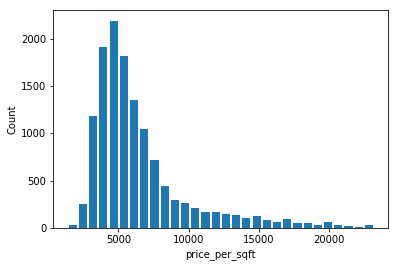

In [13]:
plt.hist(df3.price_per_sqft, bins = 30, rwidth =0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

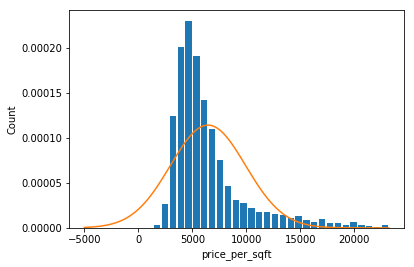

In [14]:
from scipy.stats import norm
import numpy as np
plt.hist(df3.price_per_sqft, bins = 30, rwidth =0.8, density = True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

In [15]:
#using zscore

In [16]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.head()

C:\Users\khushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [17]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [18]:
df4.shape

(13047, 8)

In [19]:
df2.shape[0] - df4.shape[0]

125